<a href="https://colab.research.google.com/github/nalin-adhikari/notebook/blob/master/Regression/Combined%20Cycle%20Power%20Plant/Regression-Combined_Cycle_Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression | Combined Cycle Power Plant

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
tf.__version__

'2.19.0'

##Part 1 - Data Preprocessing

###Importing the dataset

In [4]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Regression/Combined Cycle Power Plant/data.xlsx')
# Selects all rows (:) and all columns except the very last one (:-1). The .values then converts this selected data into a NumPy array
X = dataset.iloc[:, :-1].values
# Selects all rows (:) but only the last column (-1) from the dataset. This is also converted into a NumPy array using .values, and this array is the target variable (or dependent variable) y.
y = dataset.iloc[:, -1].values

###Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
# X and y are features and target variable (the data we want to split).
# test_size = 0.2 means that 20% of our data will be used for the 'test set', and the remaining 80% will be for the 'training set'.
# random_state = 0 is like setting a specific seed for shuffling the data. It ensures that every time we run this code, the split is exactly the same, which is good for reproducible results!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Part 2 - Building the ANN

###Initializing the ANN

In [6]:
ann = tf.keras.models.Sequential()

###Adding the input layer and the first hidden layer

In [7]:
# ann.add(...) means we are adding a new layer to our neural network, which was initialized as Sequential().
# tf.keras.layers.Dense(...) creates a 'Dense' layer, which is a standard type of layer in neural networks where every neuron in this layer is connected to every neuron in the previous layer. Think of it as a fully connected part of the network.
# units=6 specifies that this particular hidden layer will have 6 neurons. The number of neurons in a hidden layer is a hyperparameter that we can tune.
# activation='relu' sets the activation function for these 6 neurons to 'Rectified Linear Unit' (ReLU). The activation function decides whether a neuron should be activated or not, helping the network learn complex patterns. ReLU is a very common choice for hidden layers because it's computationally efficient and helps with training deeper networks.
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

###Adding the second hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

###Adding the output layer

In [9]:
# tf.keras.layers.Dense(...) again creates a 'Dense' layer, just like the hidden layers.
# units=1 specifies that this layer will have only one neuron. In regression problems, where we are trying to predict a single continuous value (like the power output in this case), the output layer typically has one neuron.
# We have not specified any activation here. When no activation function is explicitly set for the output layer in a regression problem, it defaults to a 'linear' activation. This means the neuron's output is directly its input, allowing it to predict any real-valued number, which is suitable for regression.
ann.add(tf.keras.layers.Dense(units=1))

##Part 3 - Training the ANN

###Compiling the ANN

In [10]:
# ann.compile(...) is a method that configures the model for training. Before a neural network can be trained, it needs to be compiled. This step specifies the optimizer, the loss function, and optionally, the metrics to evaluate during training.
# optimizer = 'adam' specifies the 'optimizer' algorithm. The optimizer is like the 'teacher' of the neural network. Its job is to adjust the internal weights of the network during training to minimize the 'loss'. 'Adam' is a popular and very effective optimization algorithm.
# loss = 'mean_squared_error' defines the 'loss function'. The loss function is like the 'grading system'. It measures how far off the model's predictions are from the actual values. In regression problems, where we predict continuous values, 'mean_squared_error' (MSE) is a very common choice. It calculates the average of the squared differences between the predicted and actual values. The goal of the optimizer is to make this loss as small as possible.
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

###Training the ANN model on the Training set

In [11]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 175.0605
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 46.0555
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 40.0554
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.3572
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32.3293
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.0965
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.2883
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8510
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4445
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4694
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.0136
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1030
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.8053
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5309
Epoch 15/100
240/240 ━━━━━━━

###Predicting the results of the Test set

In [14]:
# Let's pick the first 5 examples from our test set
num_examples = 5
X_test_sample = X_test[:num_examples]
y_test_sample = y_test[:num_examples]

# Ask our smart computer to make predictions for these examples
y_pred_sample = ann.predict(X_test_sample)

# Now let's compare the guesses to what actually happened!
for i in range(num_examples):
    print(f"Situation {i+1}:")
    print(f"  The power plant actually made: {y_test_sample[i]:.2f} units of electricity.")
    print(f"  Our computer guessed it would make: {y_pred_sample[i][0]:.2f} units of electricity.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Situation 1:
  The power plant actually made: 431.23 units of electricity.
  Our computer guessed it would make: 432.05 units of electricity.
Situation 2:
  The power plant actually made: 460.01 units of electricity.
  Our computer guessed it would make: 460.73 units of electricity.
Situation 3:
  The power plant actually made: 461.14 units of electricity.
  Our computer guessed it would make: 466.92 units of electricity.
Situation 4:
  The power plant actually made: 445.90 units of electricity.
  Our computer guessed it would make: 446.96 units of electricity.
Situation 5:
  The power plant actually made: 451.29 units of electricity.
  Our computer guessed it would make: 457.06 units of electricity.


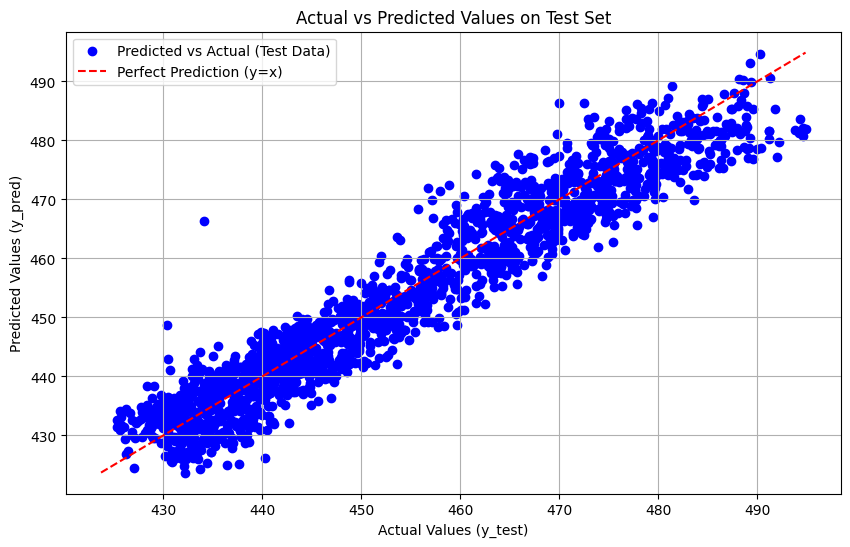

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual (Test Data)')

# Plot the perfect prediction line (y=x)
# Use NumPy's .min() and .max() methods to ensure scalar values are returned
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title('Actual vs Predicted Values on Test Set')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()